# Machine Learning Engineer Nanodegree
## Andrew Doyle
## Project: Capstone

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [48]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import os
import matplotlib.pyplot as plt
import math
import random
import warnings
warnings.filterwarnings('ignore')

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

print 'finished'

finished


In [2]:
#Import data
try:
    data = pd.read_csv('sale_pitch_data.csv')
    print "Pitch dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Pitch dataset has 2626 samples with 78 features each.


In [3]:
# Display a description of the dataset
display(data.describe())
print data.dtypes

,release_speed,release_pos_x,release_pos_z,batter,pitcher,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,...,az,sz_top,sz_bot,release_extension,game_pk,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,at_bat_number,pitch_number
count,2626.000000,2626.000000,2626.000000,2626.000000,2626.0,0.0,0.0,0.0,0.0,2626.000000,...,0.0,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000
mean,87.994402,3.192304,5.450195,522267.796268,519242.0,NaN,NaN,NaN,NaN,8.784844,...,NaN,3.494334,1.578064,5.808407,490984.842346,54.691196,0.041964,0.048426,29.863671,2.960015
std,6.911007,0.209886,0.179675,67474.756039,0.0,NaN,NaN,NaN,NaN,4.105441,...,NaN,0.262986,0.181213,0.437068,515.794783,0.437157,0.150705,0.187242,16.640916,1.771392
min,73.100000,-2.537800,4.910400,400121.000000,519242.0,NaN,NaN,NaN,NaN,1.000000,...,NaN,2.752800,1.055500,4.227000,490130.000000,53.032600,0.000000,0.000000,1.000000,1.000000
25%,81.100000,3.089550,5.334125,457705.000000,519242.0,NaN,NaN,NaN,NaN,5.000000,...,NaN,3.309425,1.470800,5.493250,490560.000000,54.407425,0.000000,0.000000,16.000000,2.000000
50%,88.800000,3.206000,5.453200,519306.000000,519242.0,NaN,NaN,NaN,NaN,9.000000,...,NaN,3.485950,1.565000,5.878500,491024.000000,54.621350,0.000000,0.000000,30.000000,3.000000
75%,94.500000,3.317175,5.561900,592206.000000,519242.0,NaN,NaN,NaN,NaN,13.000000,...,NaN,3.687950,1.680375,6.092000,491456.000000,55.006525,0.000000,0.000000,43.000000,4.000000
max,99.000000,3.679800,6.578200,643265.000000,519242.0,NaN,NaN,NaN,NaN,14.000000,...,NaN,4.392800,2.270200,7.467000,491850.000000,56.270500,0.981000,1.952000,73.000000,11.000000


pitch_type                          object
game_date                           object
release_speed                      float64
release_pos_x                      float64
release_pos_z                      float64
player_name                         object
batter                               int64
pitcher                              int64
events                              object
description                         object
spin_dir                           float64
spin_rate_deprecated               float64
break_angle_deprecated             float64
break_length_deprecated            float64
zone                                 int64
des                                 object
game_type                           object
stand                               object
p_throws                            object
home_team                           object
away_team                           object
type                                object
hit_location                        object
bb_type    

In [4]:
df_pitch = data[['pitch_type', 'effective_speed', 'release_spin_rate', 'release_extension', 'pfx_x', 'pfx_z', 'release_pos_x', 'release_pos_y', 'release_pos_z']]
print df_pitch.head()

  pitch_type effective_speed release_spin_rate  release_extension   pfx_x  \
0         FF         98.5490              2368              6.252  1.0767   
1         FF         97.3840              2414              6.103  1.2722   
2         FF         97.8860              2432              5.969  1.3104   
3         FF         97.8520              2468              6.337  1.1970   
4         FF         98.0910              2299              6.068  1.1740   

    pfx_z  release_pos_x  release_pos_y  release_pos_z  
0  1.5664         2.8604        54.2455         5.7349  
1  1.9309         3.0904        54.3945         5.9575  
2  0.8905         3.0543        54.5303         5.6698  
3  1.1911         3.0299        54.1632         5.4657  
4  0.9266         3.1368        54.4296         5.3536  


In [5]:
# Dtypes for subset
print df_pitch.dtypes

pitch_type            object
effective_speed       object
release_spin_rate     object
release_extension    float64
pfx_x                float64
pfx_z                float64
release_pos_x        float64
release_pos_y        float64
release_pos_z        float64
dtype: object


In [6]:
#Remove null values
for feature in df_pitch.keys():
    try:
        df_pitch = df_pitch[df_pitch[feature]!='null']
    except TypeError:
        continue

        
#Convert dtypes to float
df_pitch[['effective_speed', 'release_spin_rate']] = df_pitch[['effective_speed', 'release_spin_rate']].astype(float)
print df_pitch.dtypes

#Reset Index
df_pitch = df_pitch.reset_index(drop=True)

pitch_type            object
effective_speed      float64
release_spin_rate    float64
release_extension    float64
pfx_x                float64
pfx_z                float64
release_pos_x        float64
release_pos_y        float64
release_pos_z        float64
dtype: object


In [7]:
#Calculate magnitude of vector for break
df_pitch['break'] = np.sqrt(((df_pitch['pfx_x']**2)+(df_pitch['pfx_z']**2)))

print df_pitch.head()

  pitch_type  effective_speed  release_spin_rate  release_extension   pfx_x  \
0         FF           98.549             2368.0              6.252  1.0767   
1         FF           97.384             2414.0              6.103  1.2722   
2         FF           97.886             2432.0              5.969  1.3104   
3         FF           97.852             2468.0              6.337  1.1970   
4         FF           98.091             2299.0              6.068  1.1740   

    pfx_z  release_pos_x  release_pos_y  release_pos_z     break  
0  1.5664         2.8604        54.2455         5.7349  1.900761  
1  1.9309         3.0904        54.3945         5.9575  2.312329  
2  0.8905         3.0543        54.5303         5.6698  1.584342  
3  1.1911         3.0299        54.1632         5.4657  1.688647  
4  0.9266         3.1368        54.4296         5.3536  1.495615  


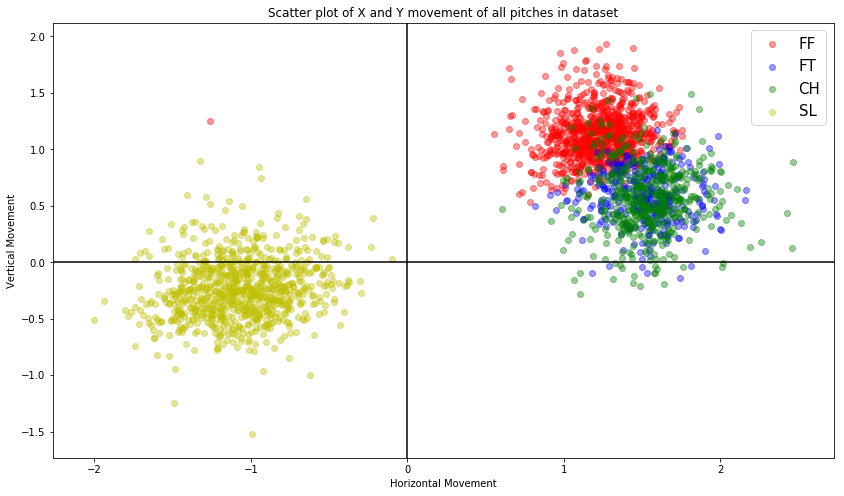

In [8]:
x1 = df_pitch['pfx_x'][df_pitch['pitch_type']=='FF']
y1 = df_pitch['pfx_z'][df_pitch['pitch_type']=='FF']
x2 = df_pitch['pfx_x'][df_pitch['pitch_type']=='FT']
y2 = df_pitch['pfx_z'][df_pitch['pitch_type']=='FT']
x3 = df_pitch['pfx_x'][df_pitch['pitch_type']=='CH']
y3 = df_pitch['pfx_z'][df_pitch['pitch_type']=='CH']
x4 = df_pitch['pfx_x'][df_pitch['pitch_type']=='SL']
y4 = df_pitch['pfx_z'][df_pitch['pitch_type']=='SL']
plt.scatter(x1, y1, alpha=.4, color='r', label = 'FF')
plt.scatter(x2, y2, alpha=.4, color='b', label = 'FT')
plt.scatter(x3, y3, alpha=.4, color='g', label = 'CH')
plt.scatter(x4, y4, alpha=.4, color='y', label = 'SL')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.xlabel('Horizontal Movement')
plt.ylabel('Vertical Movement')
plt.title('Scatter plot of X and Y movement of all pitches in dataset')

plt.legend(prop={'size': 15})
fig = plt.gcf()
fig.set_size_inches(14,8)

In [ ]:
fig, ax = plt.subplots(figsize = (14,8))
    # scatterplot of the reduced data    
    ax.scatter(x=df_pitch.loc[:, 'pfx_x'], y=df_pitch.loc[:, 'pfx_z'], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);

In [9]:
#Calculate angle of vector for break
df_pitch['angle'] = 0

for i in range(len(df_pitch)):
    df_pitch['angle'].loc[i] = math.degrees(math.atan(abs(df_pitch['pfx_z'].loc[i])/abs(df_pitch['pfx_x'].loc[i])))

#Convert angle based on quadrant of vector
for i in range(len(df_pitch)):
    if df_pitch['pfx_x'].loc[i] < 0 and df_pitch['pfx_z'].loc[i] > 0:
        df_pitch['angle'].loc[i] = 270 - df_pitch['angle'].loc[i]
    elif df_pitch['pfx_x'].loc[i] < 0 and df_pitch['pfx_z'].loc[i] < 0:
        df_pitch['angle'].loc[i] = df_pitch['angle'].loc[i] + 270
    elif df_pitch['pfx_x'].loc[i] > 0 and df_pitch['pfx_z'].loc[i] > 0:
        df_pitch['angle'].loc[i] = df_pitch['angle'].loc[i] + 90
    elif df_pitch['pfx_x'].loc[i] > 0 and df_pitch['pfx_z'].loc[i] < 0:
        df_pitch['angle'].loc[i] = 90 - df_pitch['angle'].loc[i]

print 'Finished'

Finished


In [10]:
print df_pitch.head()
print df_pitch.tail()

  pitch_type  effective_speed  release_spin_rate  release_extension   pfx_x  \
0         FF           98.549             2368.0              6.252  1.0767   
1         FF           97.384             2414.0              6.103  1.2722   
2         FF           97.886             2432.0              5.969  1.3104   
3         FF           97.852             2468.0              6.337  1.1970   
4         FF           98.091             2299.0              6.068  1.1740   

    pfx_z  release_pos_x  release_pos_y  release_pos_z     break       angle  
0  1.5664         2.8604        54.2455         5.7349  1.900761  145.496445  
1  1.9309         3.0904        54.3945         5.9575  2.312329  146.620561  
2  0.8905         3.0543        54.5303         5.6698  1.584342  124.198597  
3  1.1911         3.0299        54.1632         5.4657  1.688647  134.858446  
4  0.9266         3.1368        54.4296         5.3536  1.495615  128.282884  
     pitch_type  effective_speed  release_spin_rate

In [11]:
#Average values for each pitch type
df_pitch_descriptions = pd.DataFrame(columns=['pitch_type', 'effective_speed', 'release_spin_rate', 'release_extension', 'pfx_x', 'pfx_z', 'release_pos_x', 'release_pos_y', 'release_pos_z', 'break', 'angle'])

pitches = df_pitch['pitch_type'].unique()

for pitch in pitches:
    df = pd.DataFrame([df_pitch[df_pitch['pitch_type']==pitch].mean()])
    df['pitch_type'] = pitch
    df = df[['pitch_type', 'effective_speed', 'release_spin_rate', 'release_extension', 'pfx_x', 'pfx_z', 'release_pos_x', 'release_pos_y', 'release_pos_z', 'break', 'angle']]
    df_pitch_descriptions = df_pitch_descriptions.append(df)
    
df_pitch_descriptions = df_pitch_descriptions[['pitch_type', 'effective_speed', 'release_spin_rate', 'release_extension', 'pfx_x', 'pfx_z', 'release_pos_x', 'release_pos_y', 'release_pos_z', 'break', 'angle']]
df_pitch_descriptions=df_pitch_descriptions.reset_index(drop=True)
display(df_pitch_descriptions)


,pitch_type,effective_speed,release_spin_rate,release_extension,pfx_x,pfx_z,release_pos_x,release_pos_y,release_pos_z,break,angle
0,FF,93.865353,2333.359179,6.051976,1.216422,1.138000,3.164197,54.447531,5.519280,1.679170,133.041648
1,FT,92.798901,2221.997175,6.005661,1.512960,0.589692,3.245027,54.494067,5.373084,1.640335,111.308417
2,CH,85.803525,2019.581712,6.013362,1.531059,0.576348,3.271935,54.486181,5.264135,1.661655,110.365056
3,SL,77.776333,2383.880756,5.349344,-1.073473,-0.236222,3.149295,55.150327,5.524691,1.130673,282.023726


In [12]:
#Calculate coordinates of velocity vector
df_vector = df_pitch_descriptions[['pitch_type', 'effective_speed', 'pfx_x', 'pfx_z']]
df_vector['velo_x'] = 0
df_vector['velo_y'] = 0
df_vector['test']  = 0

for i in range(len(df_vector)):
    df_vector['velo_x'].loc[i] = df_vector['effective_speed'].loc[i] * math.cos(math.atan(abs(df_vector['pfx_z'].loc[i])/abs(df_vector['pfx_x'].loc[i])))
    df_vector['velo_y'].loc[i] = df_vector['effective_speed'].loc[i] * math.sin(math.atan(abs(df_vector['pfx_z'].loc[i])/abs(df_vector['pfx_x'].loc[i])))
    if df_vector['pfx_x'].loc[i] < 0:
        df_vector['velo_x'].loc[i] = df_vector['velo_x'].loc[i] * -1
    if df_vector['pfx_z'].loc[i] < 0:
        df_vector['velo_y'].loc[i] = df_vector['velo_y'].loc[i] * -1


#Test the velocity vectors to make sure they are correct
for i in range(len(df_vector)):
    df_vector['test'].loc[i] = np.sqrt(((df_vector['velo_x'].loc[i]**2)+(df_vector['velo_y'].loc[i]**2)))

display(df_vector)

,pitch_type,effective_speed,pfx_x,pfx_z,velo_x,velo_y,test
0,FF,93.865353,1.216422,1.138000,68.545583,64.126497,93.865353
1,FT,92.798901,1.512960,0.589692,86.463533,33.700052,92.798901
2,CH,85.803525,1.531059,0.576348,80.302332,30.228802,85.803525
3,SL,77.776333,-1.073473,-0.236222,-75.958968,-16.715057,77.776333


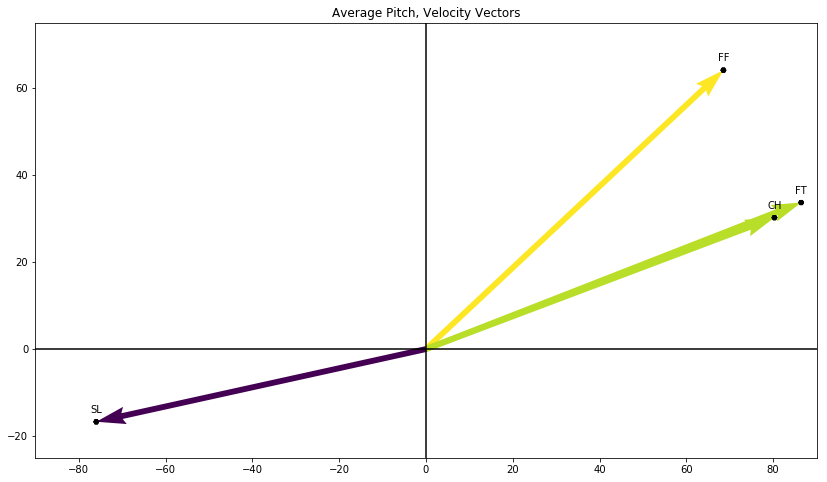

In [13]:
##### Create plot of velocity vectors to compare the pitches
soa = np.array([[0, 0, df_vector['velo_x'].loc[0], df_vector['velo_y'].loc[0]], [0, 0, df_vector['velo_x'].loc[1], df_vector['velo_y'].loc[1]], [0, 0, df_vector['velo_x'].loc[2], df_vector['velo_y'].loc[2]], [0, 0, df_vector['velo_x'].loc[3], df_vector['velo_y'].loc[3]]])
X, Y, U, V = zip(*soa)
plt.figure(figsize = (14,8))
ax = plt.gca()
Q1 = ax.quiver(X, Y, U, V, np.arctan2(V, U), angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-90, 90])
ax.set_ylim([-25, 75])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.title("Average Pitch, Velocity Vectors")

plt.quiverkey(Q1, df_vector['velo_x'].loc[0], df_vector['velo_y'].loc[0], 1, 'FF', coordinates = 'data')
plt.quiverkey(Q1, df_vector['velo_x'].loc[1], df_vector['velo_y'].loc[1], 1, 'FT', coordinates='data')
plt.quiverkey(Q1, df_vector['velo_x'].loc[2], df_vector['velo_y'].loc[2], 1, 'CH', coordinates='data')
plt.quiverkey(Q1, df_vector['velo_x'].loc[3], df_vector['velo_y'].loc[3], 1, 'SL', coordinates='data')


plt.draw()
plt.show()

In [14]:
#Drop pitch type
df_labels = df_pitch['pitch_type'].astype('category')
df_features = df_pitch.drop('pitch_type', 1)

print df_labels.head()
print df_features.head()

0    FF
1    FF
2    FF
3    FF
4    FF
Name: pitch_type, dtype: category
Categories (4, object): [CH, FF, FT, SL]
   effective_speed  release_spin_rate  release_extension   pfx_x   pfx_z  \
0           98.549             2368.0              6.252  1.0767  1.5664   
1           97.384             2414.0              6.103  1.2722  1.9309   
2           97.886             2432.0              5.969  1.3104  0.8905   
3           97.852             2468.0              6.337  1.1970  1.1911   
4           98.091             2299.0              6.068  1.1740  0.9266   

   release_pos_x  release_pos_y  release_pos_z     break       angle  
0         2.8604        54.2455         5.7349  1.900761  145.496445  
1         3.0904        54.3945         5.9575  2.312329  146.620561  
2         3.0543        54.5303         5.6698  1.584342  124.198597  
3         3.0299        54.1632         5.4657  1.688647  134.858446  
4         3.1368        54.4296         5.3536  1.495615  128.282884  


In [15]:
#TODO: Select a random pitch of each type
FF = random.choice(list(df_pitch[df_pitch['pitch_type']=='FF'].index.values))
FT  = random.choice(list(df_pitch[df_pitch['pitch_type']=='FT'].index.values))
CH = random.choice(list(df_pitch[df_pitch['pitch_type']=='CH'].index.values))
SL = random.choice(list(df_pitch[df_pitch['pitch_type']=='SL'].index.values))

indices = [FF,FT,CH,SL]
sample_labels = ['FF','FT','CH','SL']

# Create a DataFrame of the chosen samples
samples = df_features.loc[indices]

print "Chosen samples of pitch dataset:"
display(df_pitch.loc[indices])

Chosen samples of pitch dataset:


,pitch_type,effective_speed,release_spin_rate,release_extension,pfx_x,pfx_z,release_pos_x,release_pos_y,release_pos_z,break,angle
535,FF,94.317,2390.0,6.059,1.2288,1.2819,3.1880,54.4403,5.3656,1.775730,136.211595
945,FT,91.086,2359.0,5.714,1.3050,0.7915,3.1388,54.7869,5.5102,1.526269,121.237373
1677,CH,83.248,2067.0,5.638,1.7933,0.4194,3.3116,54.8627,5.2192,1.841690,103.163208
2076,SL,78.546,2314.0,5.565,-1.3235,-0.0558,3.2603,54.9345,5.5129,1.324676,272.414214


In [19]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = df_features.drop('angle',1)

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, df_features['angle'], test_size=.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor                                                                                        
regressor = DecisionTreeRegressor(random_state=42)
regressor = regressor.fit(X_train, y_train)
y_1 = regressor.predict(X_test)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print score

0.999292320323


In [20]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = df_features.drop('effective_speed',1)

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, df_features['effective_speed'], test_size=.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor                                                                                        
regressor = DecisionTreeRegressor(random_state=42)
regressor = regressor.fit(X_train, y_train)
y_1 = regressor.predict(X_test)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print score

0.834220637445


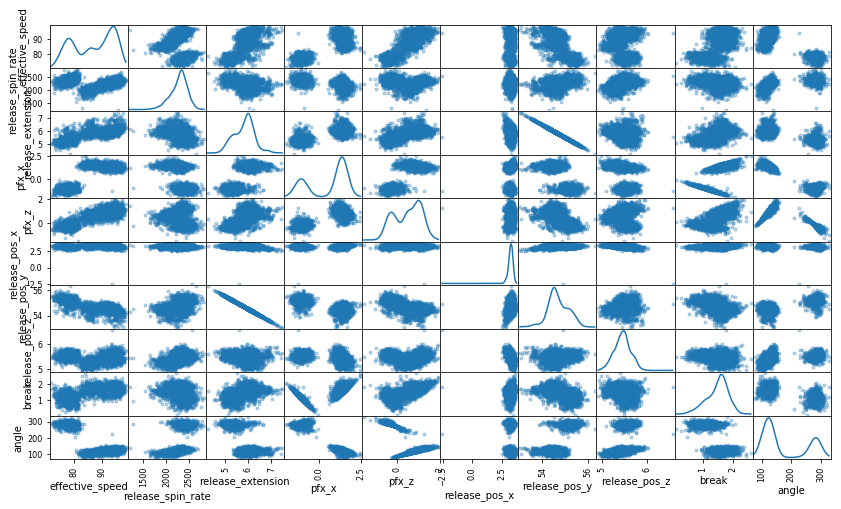

In [21]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(df_features, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

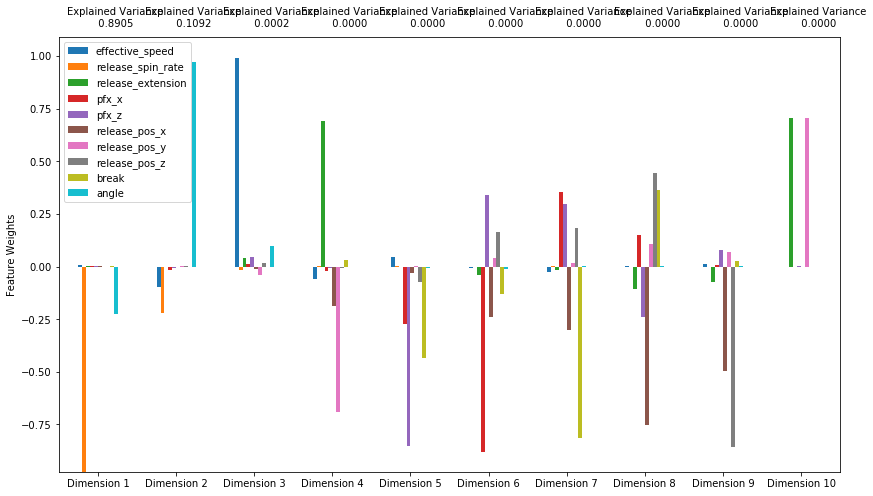

In [22]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=len(df_features.keys()))
pca.fit(df_features)

# Generate PCA results plot
pca_results = vs.pca_results(df_features, pca)

In [25]:
display(np.cumsum(pca.explained_variance_ratio_))

array([ 0.89049258,  0.99973917])

In [26]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(df_features)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(df_features)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
reduced_data2 = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

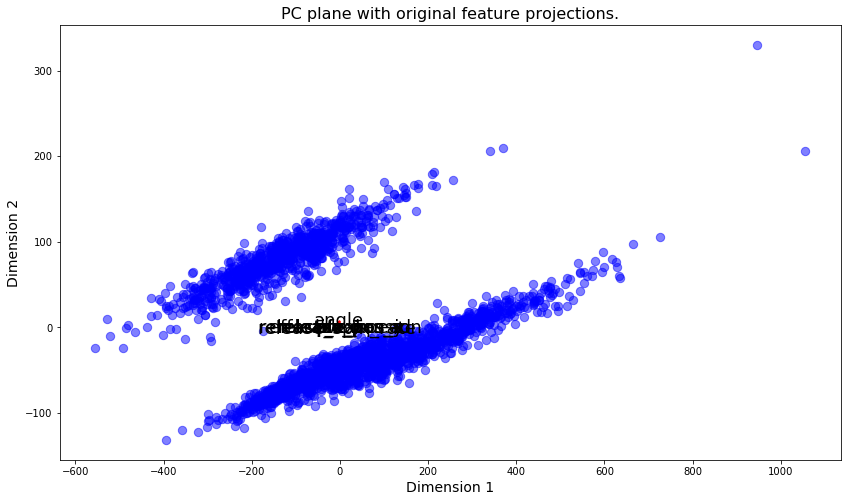

In [49]:
# Create a biplot
vs.biplot(df_features, reduced_data, pca)

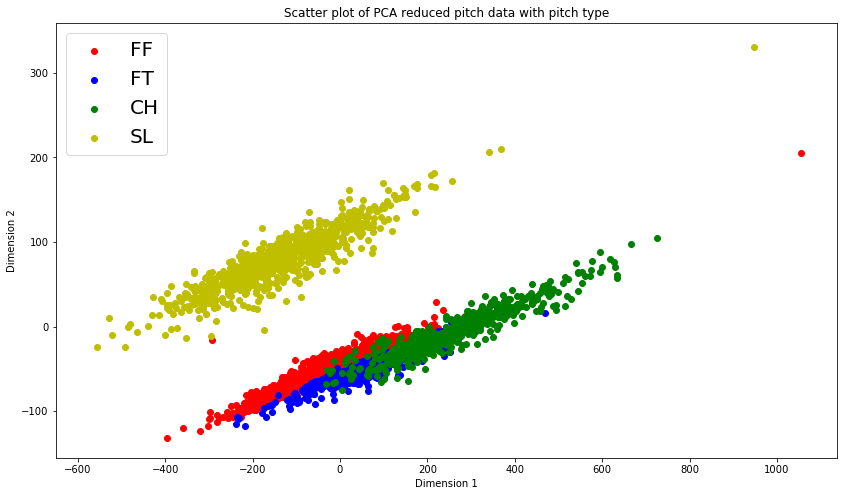

In [50]:
reduced_data2['pitch'] = df_labels

#fig, ax = plt.subplots()
x1 = reduced_data2['Dimension 1'][reduced_data2['pitch']=='FF']
y1 = reduced_data2['Dimension 2'][reduced_data2['pitch']=='FF']
x2 = reduced_data2['Dimension 1'][reduced_data2['pitch']=='FT']
y2 = reduced_data2['Dimension 2'][reduced_data2['pitch']=='FT']
x3 = reduced_data2['Dimension 1'][reduced_data2['pitch']=='CH']
y3 = reduced_data2['Dimension 2'][reduced_data2['pitch']=='CH']
x4 = reduced_data2['Dimension 1'][reduced_data2['pitch']=='SL']
y4 = reduced_data2['Dimension 2'][reduced_data2['pitch']=='SL']
plt.scatter(x1, y1, color='r', label = 'FF')
plt.scatter(x2, y2, color='b', label = 'FT')
plt.scatter(x3, y3, color='g', label = 'CH')
plt.scatter(x4, y4, color='y', label = 'SL')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter plot of PCA reduced pitch data with pitch type')

plt.legend(prop={'size': 20})
fig = plt.gcf()
fig.set_size_inches(14,8)

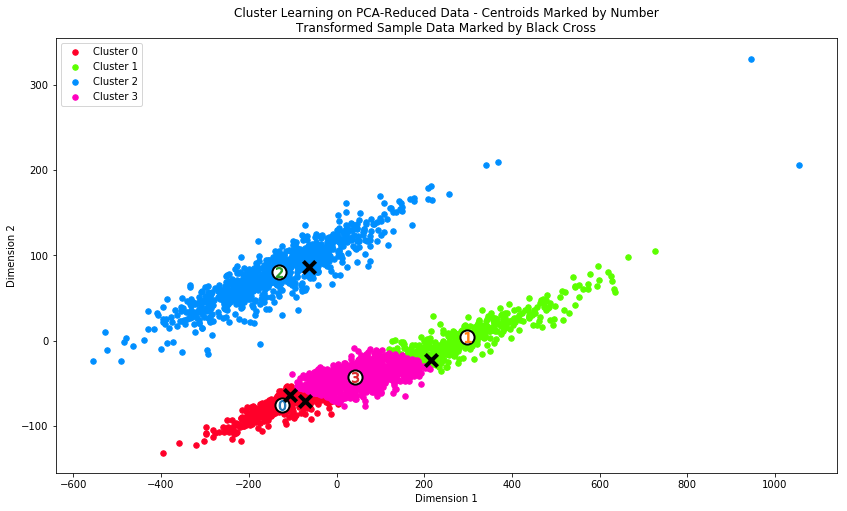

In [51]:
# Apply your clustering algorithm of choice to the reduced data
from sklearn import mixture
from sklearn.metrics import silhouette_score

# Create Gaussian mixture clustering model with 4 clusters for each of the 4 pitch classifications
clusterer = mixture.GMM(n_components=4, random_state=16)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)
score = silhouette_score(reduced_data, preds)

# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

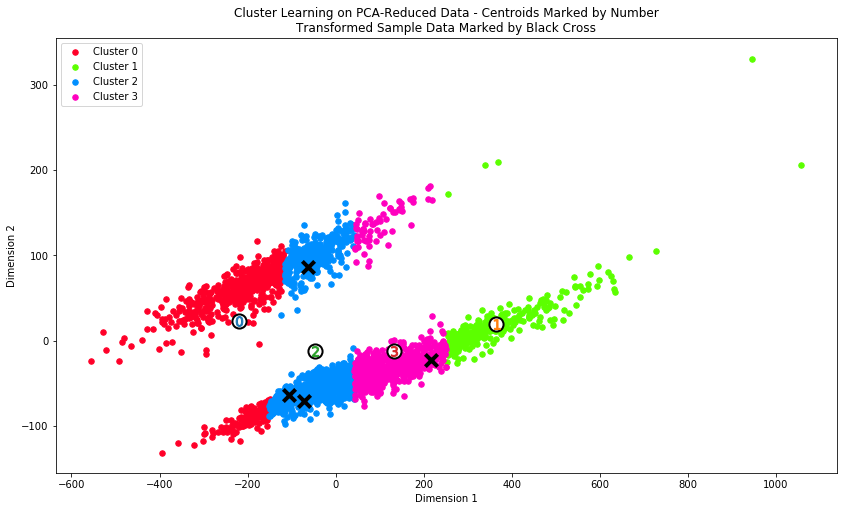

In [52]:
#Try KMeans
from sklearn.cluster import KMeans

# Create optimal clustering model
clusterer = KMeans(n_clusters=4, random_state=17)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(pca_samples)
score = silhouette_score(reduced_data, preds)

vs.cluster_results(reduced_data, preds, centers, pca_samples)

    Number of Clusters  Silhouette Score
0                  2.0          0.448473
1                  3.0          0.421090
2                  4.0          0.365389
3                  5.0          0.432599
4                  6.0          0.422288
5                  7.0          0.406530
6                  8.0          0.404671
7                  9.0          0.364691
8                 10.0          0.390580
9                 11.0          0.365753
10                12.0          0.369399
11                13.0          0.368016
12                14.0          0.341384
13                15.0          0.300969
14                16.0          0.327561
15                17.0          0.286498
16                18.0          0.292258
17                19.0          0.251620
18                20.0          0.252982
19                21.0          0.234760
20                22.0          0.217353
21                23.0          0.258415
22                24.0          0.261547
23              

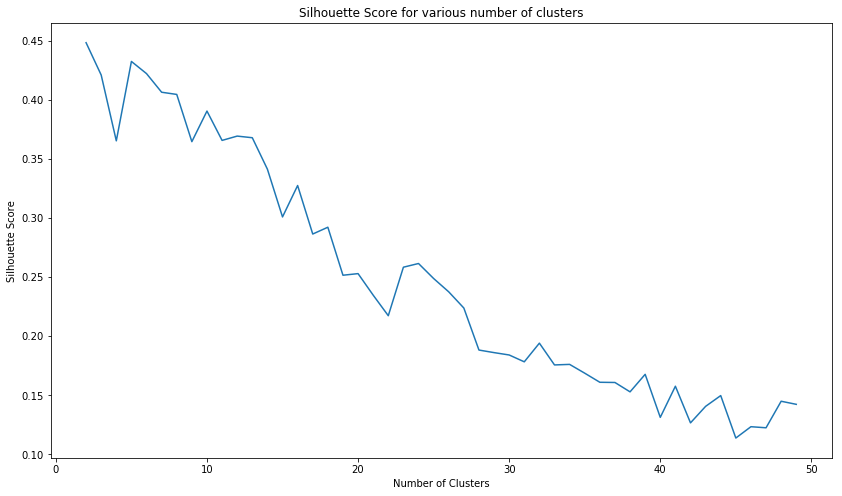

In [53]:
# Test several different values for the number of clusters
cluster_test = pd.DataFrame(columns=['Number of Clusters', 'Silhouette Score'])
for n in range(2,50):
    clusterer = mixture.GMM(n_components=n, random_state=16)
    clusterer.fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    score = silhouette_score(reduced_data, preds)
    cluster_test.loc[n-2] = n, score
print cluster_test

# Plot graph of different silhouette scores
plt.figure(figsize = (14,8))
plt.ylabel('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.title('Silhouette Score for various number of clusters')
plt.plot(cluster_test['Number of Clusters'], cluster_test['Silhouette Score'])

# Identify optimal number of clusters
num_components = int(cluster_test['Number of Clusters'][cluster_test['Silhouette Score'].argmax()])
op_score = float(cluster_test['Silhouette Score'][cluster_test['Number of Clusters'] == num_components])
print "Optimal number of clusters is {}, with a silhouette score of {}.".format(num_components, op_score)

# Create optimal clustering model
clusterer = mixture.GMM(n_components=num_components, random_state=16)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)
score = silhouette_score(reduced_data, preds)

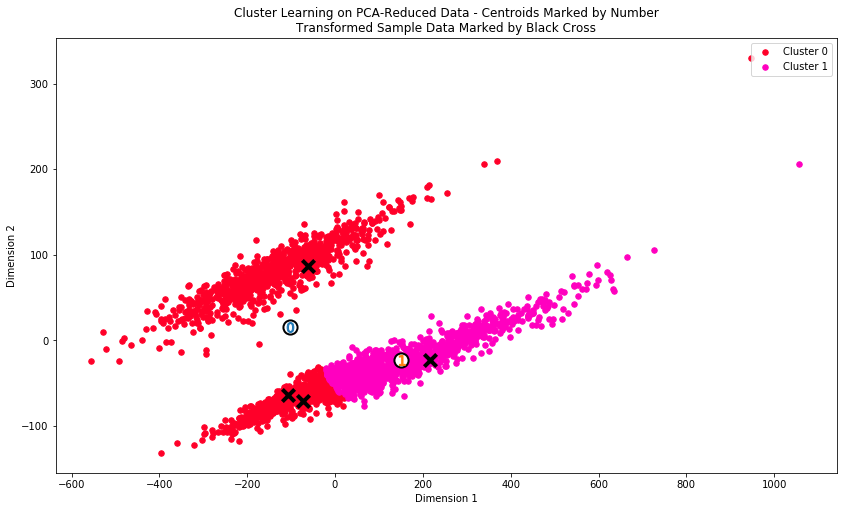

In [54]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

    Number of Clusters  Silhouette Score
0                  2.0          0.505309
1                  3.0          0.415920
2                  4.0          0.392624
3                  5.0          0.490138
4                  6.0          0.485285
5                  7.0          0.486385
6                  8.0          0.489828
7                  9.0          0.494699
8                 10.0          0.507778
9                 11.0          0.504262
10                12.0          0.490490
11                13.0          0.484612
12                14.0          0.479710
13                15.0          0.479261
14                16.0          0.472995
15                17.0          0.474133
16                18.0          0.471549
17                19.0          0.473680
18                20.0          0.469681
19                21.0          0.461467
20                22.0          0.453016
21                23.0          0.455712
22                24.0          0.446242
23              

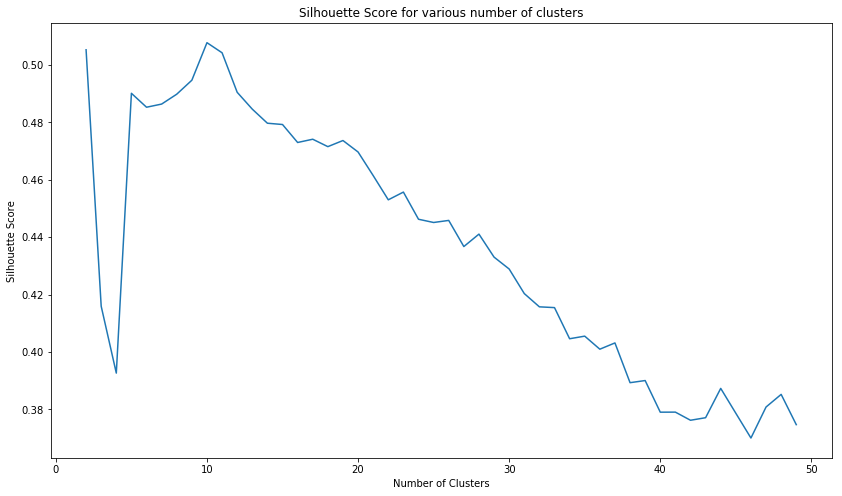

In [55]:
# Test several different values for the number of clusters
cluster_test = pd.DataFrame(columns=['Number of Clusters', 'Silhouette Score'])
for n in range(2,50):
    clusterer = KMeans(n_clusters=n, random_state=16)
    clusterer.fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    score = silhouette_score(reduced_data, preds)
    cluster_test.loc[n-2] = n, score
print cluster_test

# Plot graph of different silhouette scores
plt.figure(figsize = (14,8))
plt.ylabel('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.title('Silhouette Score for various number of clusters')
plt.plot(cluster_test['Number of Clusters'], cluster_test['Silhouette Score'])

# Identify optimal number of clusters
num_components = int(cluster_test['Number of Clusters'][cluster_test['Silhouette Score'].argmax()])
op_score = float(cluster_test['Silhouette Score'][cluster_test['Number of Clusters'] == num_components])
print "Optimal number of clusters is {}, with a silhouette score of {}.".format(num_components, op_score)

# Create optimal clustering model
clusterer = KMeans(n_clusters=num_components, random_state=16)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(pca_samples)
score = silhouette_score(reduced_data, preds)

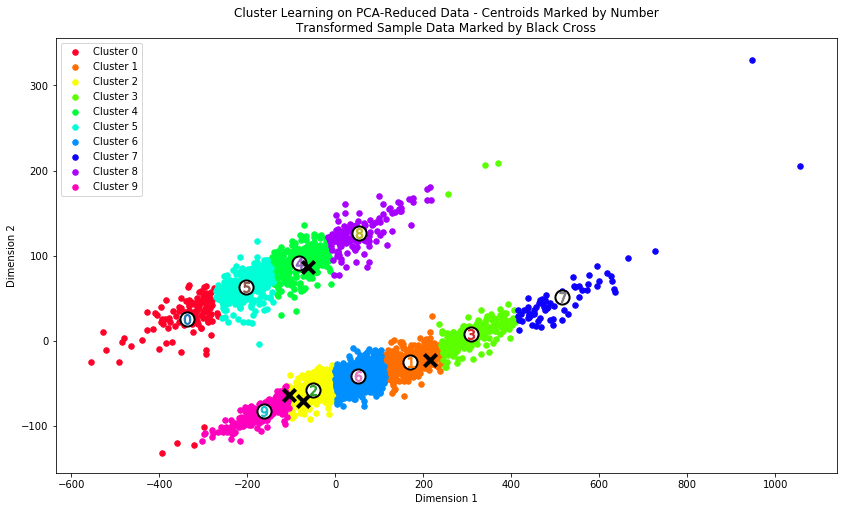

In [56]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

In [57]:
# Create optimal clustering model
clusterer = KMeans(n_clusters=10, random_state=16)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(pca_samples)
score = silhouette_score(reduced_data, preds)

# TODO: Inverse transform the centers
true_centers = pca.inverse_transform(centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = df_features.keys())
true_centers.index = segments
display(true_centers)

,effective_speed,release_spin_rate,release_extension,pfx_x,pfx_z,release_pos_x,release_pos_y,release_pos_z,break,angle
Segment 0,82.0,2596.0,5.0,-1.0,0.0,3.0,55.0,6.0,1.0,275.0
Segment 1,90.0,2111.0,6.0,1.0,1.0,3.0,54.0,5.0,2.0,112.0
Segment 2,92.0,2336.0,6.0,1.0,1.0,3.0,55.0,5.0,2.0,130.0
Segment 3,88.0,1970.0,6.0,1.0,1.0,3.0,54.0,5.0,2.0,113.0
Segment 4,77.0,2333.0,5.0,-1.0,0.0,3.0,55.0,6.0,1.0,282.0
Segment 5,80.0,2456.0,5.0,-1.0,0.0,3.0,55.0,6.0,1.0,281.0
Segment 6,91.0,2231.0,6.0,1.0,1.0,3.0,54.0,5.0,2.0,123.0
Segment 7,85.0,1758.0,6.0,2.0,0.0,3.0,54.0,5.0,2.0,109.0
Segment 8,75.0,2192.0,5.0,-1.0,0.0,3.0,55.0,5.0,1.0,285.0
Segment 9,94.0,2449.0,6.0,1.0,1.0,3.0,55.0,5.0,2.0,131.0


In [206]:
#Calculate coordinates of velocity vector
df_center_vectors = true_centers[['effective_speed', 'pfx_x', 'pfx_z', 'angle']]
df_center_vectors = df_center_vectors.iloc[:10]
df_center_vectors['velo_x'] = 0
df_center_vectors['velo_y'] = 0
df_center_vectors['test']  = 0

for i in df_center_vectors.index.values:
    if df_center_vectors['angle'].loc[i] >= 90 and df_center_vectors['angle'].loc[i] < 180:
        df_center_vectors['velo_x'].loc[i] = df_center_vectors['effective_speed'].loc[i] * math.cos(math.radians((df_center_vectors['angle'].loc[i]) - 90))
        df_center_vectors['velo_y'].loc[i] = df_center_vectors['effective_speed'].loc[i] * math.sin(math.radians((df_center_vectors['angle'].loc[i]) - 90))
    if df_center_vectors['angle'].loc[i] >= 180 and df_center_vectors['angle'].loc[i] < 270:
        df_center_vectors['velo_x'].loc[i] = (-1) * (df_center_vectors['effective_speed'].loc[i] * math.cos(math.radians(270 - (df_center_vectors['angle'].loc[i]))))
        df_center_vectors['velo_y'].loc[i] = df_center_vectors['effective_speed'].loc[i] * math.sin(math.radians(270 - (df_center_vectors['angle'].loc[i])))
    if df_center_vectors['angle'].loc[i] >= 270 and df_center_vectors['angle'].loc[i] < 360:
        df_center_vectors['velo_x'].loc[i] = (-1) * (df_center_vectors['effective_speed'].loc[i] * math.cos(math.radians((df_center_vectors['angle'].loc[i] - 270))))
        df_center_vectors['velo_y'].loc[i] = (-1) * (df_center_vectors['effective_speed'].loc[i] * math.sin(math.radians((df_center_vectors['angle'].loc[i] - 270))))
    if df_center_vectors['angle'].loc[i] >= 0 and df_center_vectors['angle'].loc[i] < 90:
        df_center_vectors['velo_x'].loc[i] = df_center_vectors['effective_speed'].loc[i] * math.cos(math.radians(90 - (df_center_vectors['angle'].loc[i])))
        df_center_vectors['velo_y'].loc[i] = (-1) * (df_center_vectors['effective_speed'].loc[i] * math.sin(math.radians(90 - (df_center_vectors['angle'].loc[i]))))

#Test the velocity vectors to make sure they are correct
for i in df_center_vectors.index.values:
    df_center_vectors['test'].loc[i] = np.sqrt(((df_center_vectors['velo_x'].loc[i]**2)+(df_center_vectors['velo_y'].loc[i]**2)))


display(df_center_vectors)

,effective_speed,pfx_x,pfx_z,angle,velo_x,velo_y,test
Segment 0,82.0,-1.0,0.0,275.0,-81.687965,-7.146771,82.0
Segment 1,90.0,1.0,1.0,112.0,83.446547,33.714593,90.0
Segment 2,92.0,1.0,1.0,130.0,70.476089,59.136460,92.0
Segment 3,88.0,1.0,1.0,113.0,81.004427,34.384339,88.0
Segment 4,77.0,-1.0,0.0,282.0,-75.317365,-16.009200,77.0
Segment 5,80.0,-1.0,0.0,281.0,-78.530175,-15.264720,80.0
Segment 6,91.0,1.0,1.0,123.0,76.319022,49.562152,91.0
Segment 7,85.0,2.0,0.0,109.0,80.369079,27.673293,85.0
Segment 8,75.0,-1.0,0.0,285.0,-72.444437,-19.411428,75.0
Segment 9,94.0,1.0,1.0,131.0,70.942701,61.669549,94.0


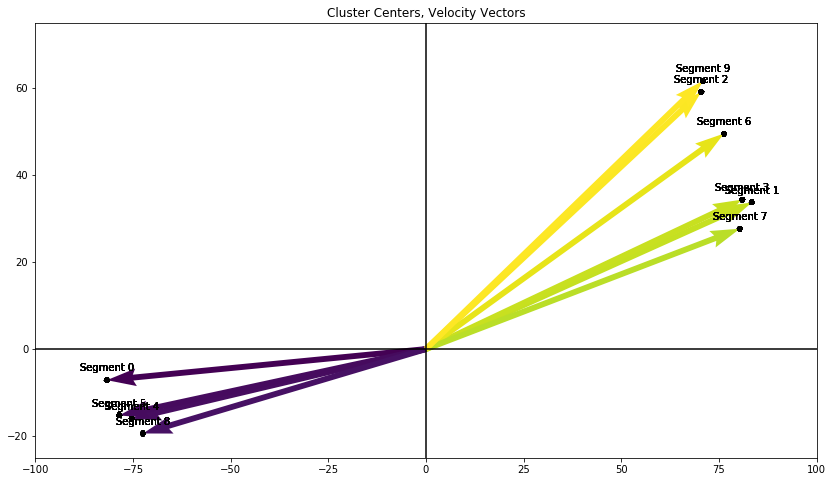

In [209]:
##### Create plot of velocity vectors to compare the pitches

soa = np.empty([1,4])
for i in df_center_vectors.index.values:
    soa = np.append(soa, np.array([[0, 0, df_center_vectors['velo_x'].loc[i], df_center_vectors['velo_y'].loc[i]]]), axis=0)

soa = soa[1:11]
X, Y, U, V = zip(*soa)
plt.figure(figsize = (14,8))
ax = plt.gca()
Q1 = ax.quiver(X, Y, U, V, np.arctan2(V, U), angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-100, 100])
ax.set_ylim([-25, 75])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.title("Cluster Centers, Velocity Vectors")

for i in range(len(df_center_vectors)):
    plt.quiverkey(Q1, df_center_vectors['velo_x'].iloc[0], df_center_vectors['velo_y'].iloc[0], 0, 'Segment 0', coordinates = 'data')
    plt.quiverkey(Q1, df_center_vectors['velo_x'].iloc[1], df_center_vectors['velo_y'].iloc[1], 0, 'Segment 1', coordinates = 'data')
    plt.quiverkey(Q1, df_center_vectors['velo_x'].iloc[2], df_center_vectors['velo_y'].iloc[2], 0, 'Segment 2', coordinates = 'data')
    plt.quiverkey(Q1, df_center_vectors['velo_x'].iloc[3], df_center_vectors['velo_y'].iloc[3], 0, 'Segment 3', coordinates = 'data')
    plt.quiverkey(Q1, df_center_vectors['velo_x'].iloc[4], df_center_vectors['velo_y'].iloc[4], 0, 'Segment 4', coordinates = 'data')
    plt.quiverkey(Q1, df_center_vectors['velo_x'].iloc[5], df_center_vectors['velo_y'].iloc[5], 0, 'Segment 5', coordinates = 'data')
    plt.quiverkey(Q1, df_center_vectors['velo_x'].iloc[6], df_center_vectors['velo_y'].iloc[6], 0, 'Segment 6', coordinates = 'data')
    plt.quiverkey(Q1, df_center_vectors['velo_x'].iloc[7], df_center_vectors['velo_y'].iloc[7], 0, 'Segment 7', coordinates = 'data')
    plt.quiverkey(Q1, df_center_vectors['velo_x'].iloc[8], df_center_vectors['velo_y'].iloc[8], 0, 'Segment 8', coordinates = 'data')
    plt.quiverkey(Q1, df_center_vectors['velo_x'].iloc[9], df_center_vectors['velo_y'].iloc[9], 0, 'Segment 9', coordinates = 'data')


plt.draw()
plt.show()

In [88]:
print soa

[[  0.           0.          68.54558323  64.12649689]
 [  0.           0.          86.46353288  33.70005242]
 [  0.           0.          80.30233191  30.22880155]
 [  0.           0.         -75.95896799 -16.71505749]]


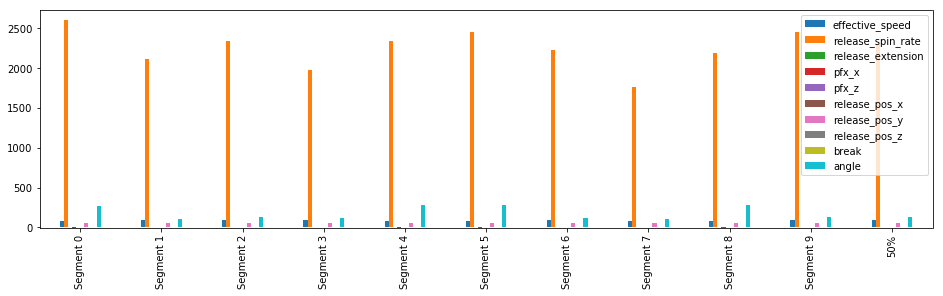

In [58]:
true_centers = true_centers.append(df_features.describe().ix['50%'])
true_centers.plot(kind = 'bar', figsize = (16, 4))

Sample point 0 ( FF ) predicted to be in Cluster 2
Sample point 1 ( FT ) predicted to be in Cluster 2
Sample point 2 ( CH ) predicted to be in Cluster 1
Sample point 3 ( SL ) predicted to be in Cluster 4


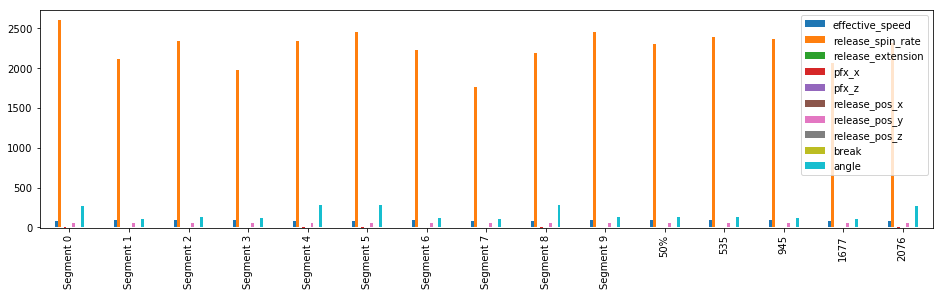

In [59]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i,"(", sample_labels[i],")", "predicted to be in Cluster", pred
    

# Plot samples
true_centers = true_centers.append(samples)
true_centers.plot(kind = 'bar', figsize = (16, 4))